<a href="https://colab.research.google.com/github/Annani33/Sales-analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SQL-request:** https://github.com/Annani33/Sales-analysis/blob/main/SQL-request

In [ ]:
# import data
import pandas as pd
import numpy as np
import statsmodels.api as sm
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import shapiro, normaltest, kruskal
from statsmodels.stats.proportion import proportions_ztest

# connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
# changing work folder
%cd /content/drive/MyDrive/Mate_Data_anal/Pandas/bq-results-20251028-120532-1761653177195

# import CSV file
data = pd.read_csv("bq-results-20251028-120532-1761653177195.csv")
data.head()

Mounted at /content/drive
/content/drive/MyDrive/Mate_Data_anal/Pandas/bq-results-20251028-120532-1761653177195


,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,registered_user_id,is_email_verified,is_subscribed,product_category,product_name,product_price,product_description,user_status
0,2020-11-06,7799937037,Europe,Slovakia,mobile,Chrome,<Other>,Web,fr,referral,Paid Search,NaN,No,Yes,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm",Guest
1,2020-11-10,4020421879,Americas,United States,desktop,Chrome,Safari,Macintosh,en,(none),Direct,653378.0,Yes,Yes,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm",Registered
2,2020-11-24,6717382496,Americas,United States,desktop,Chrome,Chrome,Web,en-us,referral,Social Search,NaN,No,Yes,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm",Guest
3,2020-11-26,2093497337,Americas,United States,desktop,Chrome,Chrome,Web,en-us,(none),Direct,NaN,No,Yes,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm",Guest
4,2020-12-03,9506718330,Europe,Spain,desktop,Chrome,ChromeBook,<Other>,en-us,referral,Paid Search,NaN,No,Yes,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm",Guest


**Data overview**

In [ ]:

print(data.shape)
print(data.dtypes)
print(data.info())
print(data.describe())
unique_sessions = data['ga_session_id'].nunique()
time_start = data['order_date'].min()
time_end = data['order_date'].max()

print (unique_sessions)
print(time_start)
print(time_end)

(33538, 18)
order_date             datetime64[ns]
ga_session_id                   int64
continent                      object
country                        object
device                         object
browser                        object
mobile_model_name              object
operating_system               object
language                       object
traffic_source                 object
traffic_channel                object
registered_user_id            float64
is_email_verified              object
is_subscribed                  object
product_category               object
product_name                   object
product_price                 float64
product_description            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           33538 non-null  datetime64[ns]
 1   ga_se

Number of colums: 18.  

Number of numeric columns: 3.

Number of categorical columns: 14.

Number of datetime colums: 0.

Number of unique sessions: 33538.

Time period: 2020-11-01 - 2021-01-27.

Missing values are: language, registered_user_id


In [ ]:
# converting to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

# checking
print(data['order_date'].dtype)

datetime64[ns]


**Data analysis**

In [ ]:
# calculating of top by sales and orders
continent_sales = data.groupby('continent')['product_price'].sum().nlargest(3)
country_sales = data.groupby('country')['product_price'].sum().nlargest(5)

continent_orders = data['continent'].value_counts().nlargest(3)
country_orders = data['country'].value_counts().nlargest(5)

print("Top 3 of continents by sales:", continent_sales)
print("Top 5 of countries by sales:", country_sales)
print("Top 3 of continents by orders:", continent_orders)
print("Top 5 of countries by orders:", country_orders)

Top 3 of continents by sales: continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: product_price, dtype: float64
Top 5 of countries by sales: country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: product_price, dtype: float64
Top 3 of continents by orders: continent
Americas    18553
Asia         7950
Europe       6261
Name: count, dtype: int64
Top 5 of countries by orders: country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Name: count, dtype: int64


In [ ]:
# calculating of top country by sales
top_country = data.groupby('country')['product_price'].sum().idxmax()
# calculating of top 10 categories by sales
top_categories = data.groupby('product_category')['product_price'].sum().nlargest(10)
# calculating of top 10 categories in top 10 countries
country_top_categories = data[data['country'] == top_country].groupby('product_category')['product_price'].sum().nlargest(10)

print("top countries by sales: {top_country}")
print("top 10 categories by sales:")
print(top_categories)

print("top 10 categories in {top_country}:")
print(country_top_categories)

# comparing top 10 categories in top country vs top 10 categories
if top_categories.index.tolist() == country_top_categories.index.tolist():
    print("\ntop 10 categories in top country are equal to top 10 categories.")
else:
    print("\ntop 10 categories in top country are not equal to top 10 categories.")

top country by sales: {top_country}
top 10 categories by sales:
product_category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: product_price, dtype: float64
top 10 categories in {top_country}:
product_category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Ba

In [ ]:
# calculating sales by devices
device_sales = data.groupby('mobile_model_name')['product_price'].sum()
device_sales_share = (device_sales / device_sales.sum()) * 100
device_sales_share_rounded = device_sales_share.round(1)
print("sales by devices (%):\n", device_sales_share_rounded, "\n")

# calculating sales by traffic source
traffic_sales = data.groupby('traffic_source')['product_price'].sum()
traffic_sales_share = (traffic_sales / traffic_sales.sum()) * 100
traffic_sales_share_rounded = traffic_sales_share.round(1)
print("sales by traffic source (%):\n", traffic_sales_share_rounded)

sales by devices (%):
 mobile_model_name
<Other>       20.4
Chrome        27.8
ChromeBook     5.7
Edge           2.2
Firefox        1.3
Pixel 3        0.3
Pixel 4 XL     0.4
Safari        20.3
iPad           1.4
iPhone        20.1
Name: product_price, dtype: float64 

sales by traffic source (%):
 traffic_source
(data deleted)     6.4
(none)            23.4
<Other>           14.0
cpc                4.3
organic           34.2
referral          17.6
Name: product_price, dtype: float64


In [ ]:
# calculating of confirmed emails
confirmed_emails = data['is_email_verified'].value_counts(normalize=True) * 100
print("confirmed emails (%):\n", confirmed_emails, "\n")

# calculating of unsubscribed users
subscribed_users = data['is_subscribed'].value_counts(normalize=True) * 100
print("unsubscribed users (%):", subscribed_users, "\n")

# calculating of top contries by registered users
top_countries_by_registered_users = data.groupby('country')['registered_user_id'].nunique().nlargest(5)

print("top contries by registered users:")
print(top_countries_by_registered_users)



confirmed emails (%):
 is_email_verified
No     94.069414
Yes     5.930586
Name: proportion, dtype: float64 

unsubscribed users (%): is_subscribed
Yes    98.667183
No      1.332817
Name: proportion, dtype: float64 

top contries by registered users:
country
United States     1207
India              246
Canada             207
United Kingdom      88
France              56
Name: registered_user_id, dtype: int64


In [ ]:
# creating new column 'user_status'
data['user_status'] = np.where(
    data['registered_user_id'].notna(), # check if NaN
    'Registered',                       # if not NaN,
    'Guest'                             # if NaN
)

# saving DataFrame to a new CSV
output_file_name = 'bq-results-20251028-120532-1761653177195.csv'
data.to_csv(output_file_name, index=False, encoding='utf-8')

print(f"✅ File saved: {output_file_name}")
print("new data (first 5 rows):")
print(data[['registered_user_id', 'user_status', 'product_price']].head())

✅ File saved: bq-results-20251028-120532-1761653177195.csv
new data (first 5 rows):
   registered_user_id user_status  product_price
0                 NaN       Guest            5.0
1            653378.0  Registered            5.0
2                 NaN       Guest            5.0
3                 NaN       Guest            5.0
4                 NaN       Guest            5.0


In [ ]:
# sales by register status
# aggregation
sales_summary = data.groupby('user_status')['product_price'].agg(
    Total_Sales_UAH='sum',
    Average_Check='mean',
    Total_Orders='count'
)
# rounding
sales_summary = sales_summary.round(2)
# calculating share
total_sales_sum = sales_summary['Total_Sales_UAH'].sum()

sales_summary['Sales_Share_%'] = (sales_summary['Total_Sales_UAH'] / total_sales_sum) * 100
sales_summary['Sales_Share_%'] = sales_summary['Sales_Share_%'].round(1)

print("Sales by register status:")
print(sales_summary)

Sales by register status:
             Total_Sales_UAH  Average_Check  Total_Orders  Sales_Share_%
user_status                                                             
Guest             29389212.6         955.53         30757           91.9
Registered         2582518.5         928.63          2781            8.1


In [ ]:
# sales by subscribed status
# aggregation
subscription_sales_summary = data.groupby('is_subscribed')['product_price'].agg(
    Total_Sales_UAH='sum',
    Average_Check='mean',
    Total_Orders='count'
)

# rounding
subscription_sales_summary = subscription_sales_summary.round(2)
# calculating share
total_sales_sum = subscription_sales_summary['Total_Sales_UAH'].sum()
subscription_sales_summary['Sales_Share_%'] = (
    subscription_sales_summary['Total_Sales_UAH'] / total_sales_sum
) * 100
subscription_sales_summary['Sales_Share_%'] = subscription_sales_summary['Sales_Share_%'].round(1)

print("Sales by subscribed status:")
print(subscription_sales_summary)

Sales by subscribed status:
               Total_Sales_UAH  Average_Check  Total_Orders  Sales_Share_%
is_subscribed                                                             
No                    431721.6         965.82           447            1.4
Yes                 31540009.5         953.13         33091           98.6


**Summary**

1. Market Concentration & Dominance

Geographic Concentration: The business demonstrates extreme market dependence on the Americas region, which accounts for the largest share in both sales (≈$17.7M) and orders (18.6K). Specifically, the United States is the primary revenue driver, contributing the majority of sales within the region.

Product Stability: The top 10 categories by global sales are identical to the top 10 categories in the lead country (United States). This indicates that the core product market—dominated by Sofas & armchairs, Chairs, and Beds—is universal across the main operational geographies.

2. Digital Channel Performance

Traffic Reliance: Organic Search is the most significant traffic channel (34.2%), positioning SEO as the primary cost-effective acquisition strategy. However, the high share of (none) traffic (23.4%) indicates potential success in direct brand recall or a significant volume of untracked internal/direct sales.

Device Fragmentation: Sales are highly fragmented across browser and device models. Chrome is the leading single browser/model (27.8%), but the combined sales of Safari, iPhone, and iPad (Apple ecosystem) form a critical, large segment, requiring meticulous optimization for iOS devices.

3. Customer Segmentation & Value

Guest Sales Dominance: The business operates overwhelmingly on a Guest checkout model, with unregistered users (Guests) generating 91.9% of total sales. Despite Registered users having a comparable average check (≈$929), their total revenue contribution (8.1%) is marginal.

Conversion and Loyalty Opportunity: The low share of Registered sales, coupled with a very low confirmed email rate (≈6%), highlights a critical, unaddressed business risk: the company is highly efficient at driving one-time purchases but failing in customer retention and lifecycle management.

Actionable Insight: The primary focus must shift to optimizing the registration/email verification funnel and implementing stronger incentives to move high-volume Guest shoppers into the high-value Registered segment to secure long-term revenue stability.

**Dynamic sales**

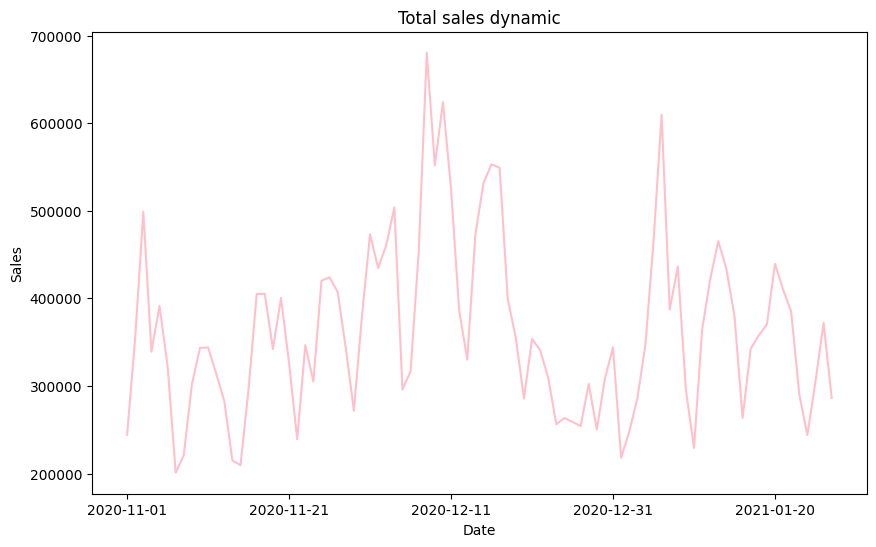

In [ ]:
# sales by date
sales_by_date = data.groupby('order_date')['product_price'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sales_by_date.plot(title="Total sales dynamic", color="pink")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


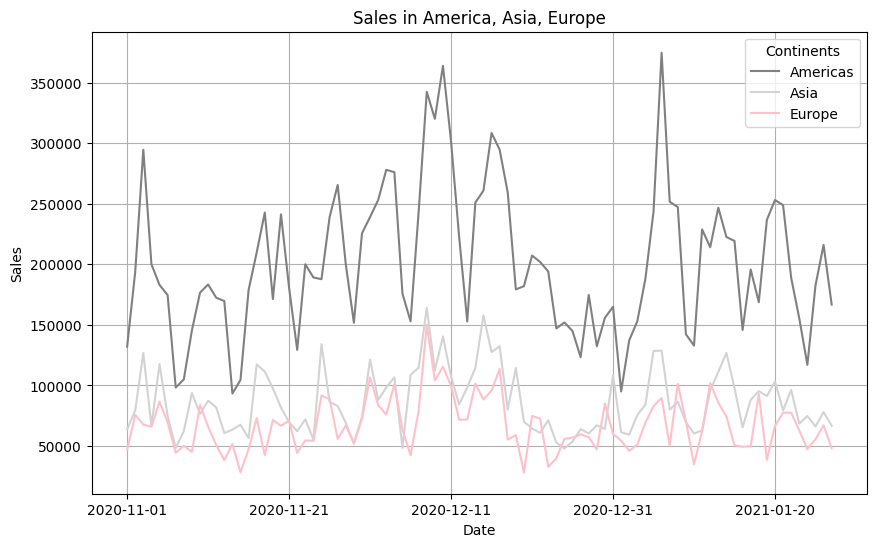

In [ ]:
# sales by date and continent

# groupping of data
sales_by_date_and_continent = data.groupby(['order_date', 'continent'])['product_price'].sum().unstack()
filtered_continents = ['Americas', 'Asia', 'Europe']
filtered_sales = sales_by_date_and_continent[filtered_continents]

# creating plot
custom_colors = ['gray', 'lightgray', 'pink']
filtered_sales.plot(
    title="Sales in America, Asia, Europe",
    figsize=(10, 6),
    color=custom_colors
)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Continents")
plt.grid(True)
plt.show()

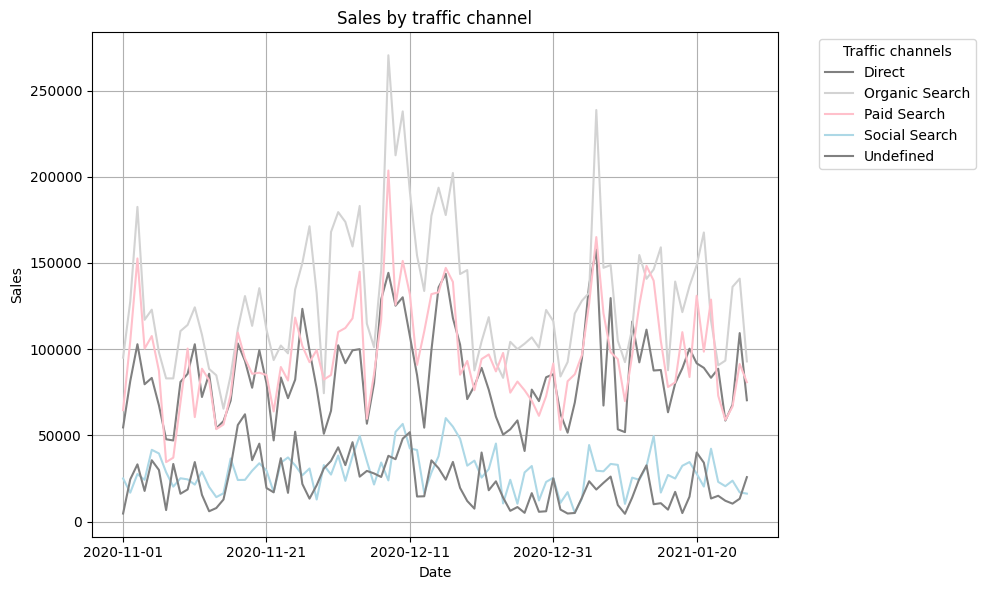

In [ ]:
# sales by date and traffic channel

# grouping of data
sales_by_date_and_traffic = data.groupby(['order_date', 'traffic_channel'])['product_price'].sum().unstack()

# creating plot
custom_colors = ['gray', 'lightgray', 'pink', 'lightblue']
sales_by_date_and_traffic.plot(
    title="Sales by traffic channel",
    figsize=(10, 6),
    color=custom_colors
)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Traffic channels", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

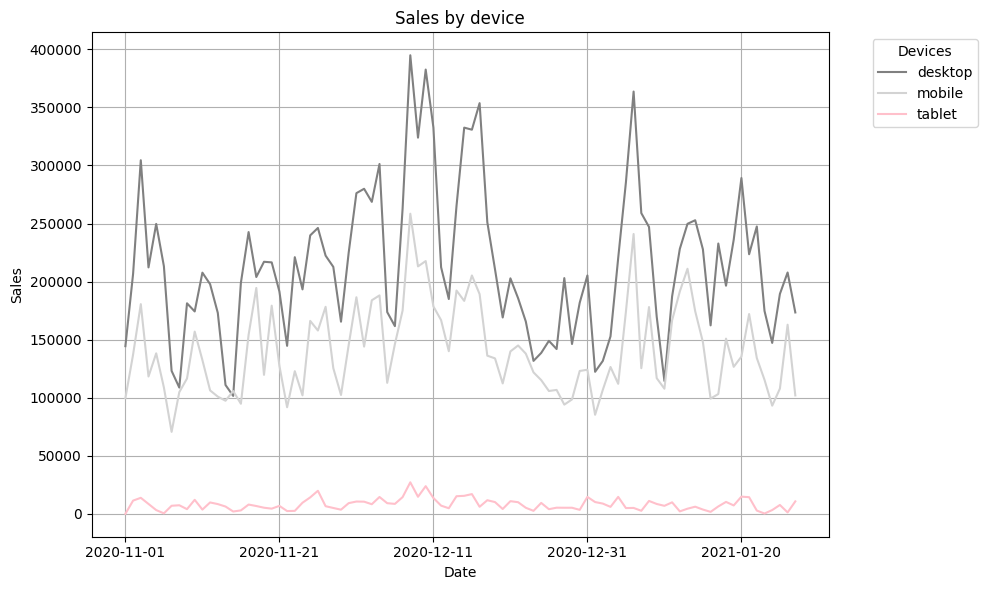

In [ ]:
# sales by date and device

# groupping of data
sales_by_date_and_device = data.groupby(['order_date', 'device'])['product_price'].sum().unstack()

# creating plot
custom_colors = ['gray', 'lightgray', 'pink']
sales_by_date_and_device.plot(
    title="Sales by device",
    figsize=(10, 6),
    color=custom_colors
)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Devices", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary:**

1. The Americas region is the undisputed leader in sales volume, consistently generating the highest revenue throughout the entire period observed.

All three regions (Americas, Asia, Europe) display identical peaks and troughs on the same dates.

2. Dominant Channel (Organic): Organic traffic is the clear leader, generating the largest share of sales. This strongly indicates an extremely healthy SEO strategy, high domain authority, and strong organic appeal to the target audience.

Implication: This is the most cost-effective revenue source, as the Customer Acquisition Cost (CAC) via this channel is minimal.

Significance of Paid Search: Paid Search (paid advertising) is the second most significant source of revenue. This suggests that paid campaigns are effectively managed and are crucial for immediate customer acquisition.

3. Dominant Channel (Desktop): Desktop is the primary sales channel, generating the largest share of revenue. This is an uncommon finding in modern e-commerce, suggesting specific characteristics about the company's products or customer base.

Interpretation: Customers likely make higher-value, more complex, or considered purchases (e.g., B2B, specialized services, luxury goods) that require the detailed interface and stability of a desktop environment.

Significance of Mobile: Mobile is the secondary channel, accounting for a significant, but smaller, share of sales.

**Conclusion:**

1. The main strategic focus must be on maintaining stability and protecting market share in the Americas. Given its dominance, any dip in sales here will have the largest negative impact on overall company revenue. Investments should aim at increasing the baseline sales level and enhancing customer loyalty.

A best practices analysis should be conducted, specifically looking at the strategies, marketing, and localization efforts used in the Americas. This successful model should then be scaled and adapted to Asia and Europe to close the revenue gap and diversify income streams.

2. A deeper analytical dive is required to identify the specific causes of the sharp sales dips immediately following the peaks. If these peaks are primarily driven by heavy discounts, a strategy must be developed to improve customer retention and boost full-price sales to prevent rapid revenue erosion.

3. Maintain continuous analysis of the global triggers (promotions/seasonality) that affect sales across all three regions simultaneously.

4. Priority: Protect Organic. The primary business focus must be on protecting and continuing to invest in SEO to maintain this dominant, low-cost position.

5. Growth Area: Direct Traffic. Direct traffic, often a proxy for brand loyalty and retention, has a low share. This suggests that brand-building efforts or dedicated email marketing campaigns may not be yielding sufficient results and warrant increased investment.

6. Desktop Priority: While mobile optimization is important for browsing and early engagement, the primary focus for conversion optimization and checkout flow must be the Desktop platform. Any issues on the Desktop funnel directly threaten the core revenue stream.

7. Mobile Strategy: The mobile strategy should be reviewed. It might be better used for discovery, lead generation, and content consumption, rather than serving as the main conversion path. The company should investigate why users prefer to switch to Desktop to complete their purchase.



**Analysis with pivot tables**

In [ ]:
# sessions by traffic channel and device
# creating pivot table
sessions_pivot = data.pivot_table(
    values='ga_session_id',
    index='traffic_channel',
    columns='device',
    aggfunc='count'
)
print("Sessions by traffic channel and device:\n", sessions_pivot)

Sessions by traffic channel and device:
 device           desktop  mobile  tablet
traffic_channel                         
Direct              4655    2985     160
Organic Search      7011    4655     255
Paid Search         5261    3574     207
Social Search       1594    1065      57
Undefined           1181     834      44


In [ ]:
# sales by top 10 category in top 5 countries
# calculating total sales in top 5 countries
country_sales = data.groupby('country')['product_price'].sum().sort_values(ascending=False)
top_countries_sales = country_sales.head(5).index.tolist()
# calculating total sales by category and top 10 categories
category_sales = data.groupby('product_category')['product_price'].sum().sort_values(ascending=False)
top_categories_sales = category_sales.head(10).index.tolist()
# creating pivot table
top_categories_pivot = data[data['country'].isin(top_countries_sales) & data['product_category'].isin(top_categories_sales)].pivot_table(
    values='product_price',
    index='product_category',
    columns='country',
    aggfunc='sum'
)

print("Sales by top 10 category in top 5 countries:\n", top_categories_pivot)


Sales by top 10 category in top 5 countries:
 country                             Canada    France     India  \
product_category                                                 
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
product_category                                                 
Bar furniture                

Sales by continent and traffic channel:
traffic_channel     Direct  Organic Search  Paid Search  Social Search  \
continent                                                                
(not set)          21443.0         15080.0      19931.0        11224.4   
Africa             70028.0        129908.4      88195.0        31187.6   
Americas         4222962.0       6294563.2    4627454.3      1384427.7   
Asia             1755294.5       2725953.8    2039256.5       576031.8   
Europe           1343093.9       2154138.6    1620206.1       498507.1   
Oceania            82102.0        113507.6     116006.5        30727.1   

traffic_channel  Undefined  
continent                   
(not set)           6389.0  
Africa             11912.0  
Americas         1135872.8  
Asia              504761.7  
Europe            318678.5  
Oceania            22887.0  


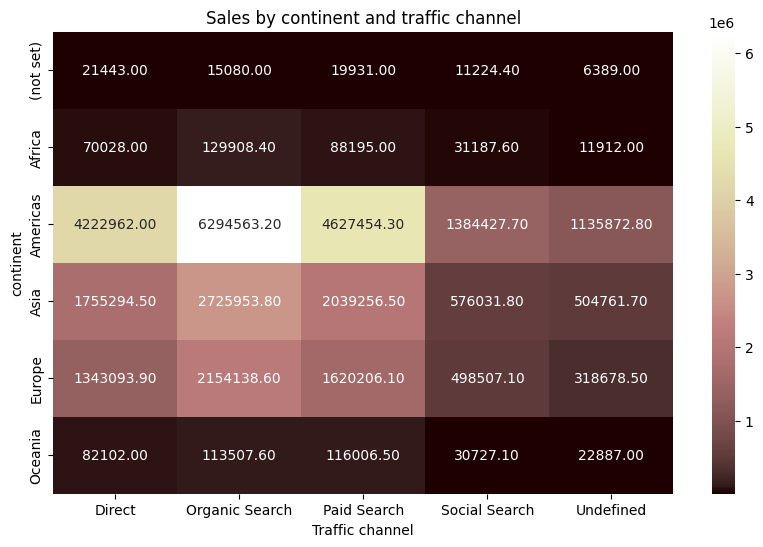

In [ ]:
# sales by continent and traffic channel
# creating pivot table
pivot_sales_continent_traffic_channel = data.pivot_table(
    index='continent',
    columns='traffic_channel',
    values='product_price',
    aggfunc='sum'
)

print("Sales by continent and traffic channel:")
print(pivot_sales_continent_traffic_channel)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sales_continent_traffic_channel, annot=True, fmt=".2f", cmap="pink")
plt.title("Sales by continent and traffic channel")
plt.xlabel("Traffic channel")
plt.ylabel("continent")
plt.show()


In [ ]:
# sales by country and traffic channel
# creating pivot table
pivot_sales_country_traffic_channel = data.pivot_table(
    index='country',
    columns='traffic_channel',
    values='product_price',
    aggfunc='sum'
)

print("Sales by contry and traffic_channel:")
print(pivot_sales_country_traffic_channel )

Sales by contry and traffic_channel:
traffic_channel     Direct  Organic Search  Paid Search  Social Search  \
country                                                                  
(not set)          60208.0        107299.0      64716.9        17811.4   
Albania             3795.0          3880.0       4265.0          690.0   
Algeria             8485.0          3589.0      10418.0          695.0   
Argentina          19664.4         21828.0      39769.0         4283.0   
Armenia             2083.0           549.0       4546.4           35.0   
...                    ...             ...          ...            ...   
United Kingdom    203728.9        356438.9     278652.6        51836.0   
United States    3346860.3       4958993.0    3589463.4      1132651.1   
Uruguay             1627.0          1543.0       6208.0          100.0   
Venezuela           8785.0          4746.0       4357.0            NaN   
Vietnam            39246.6         29201.0      46548.0        24387.0   



**Statistical Analysis of Relationships**

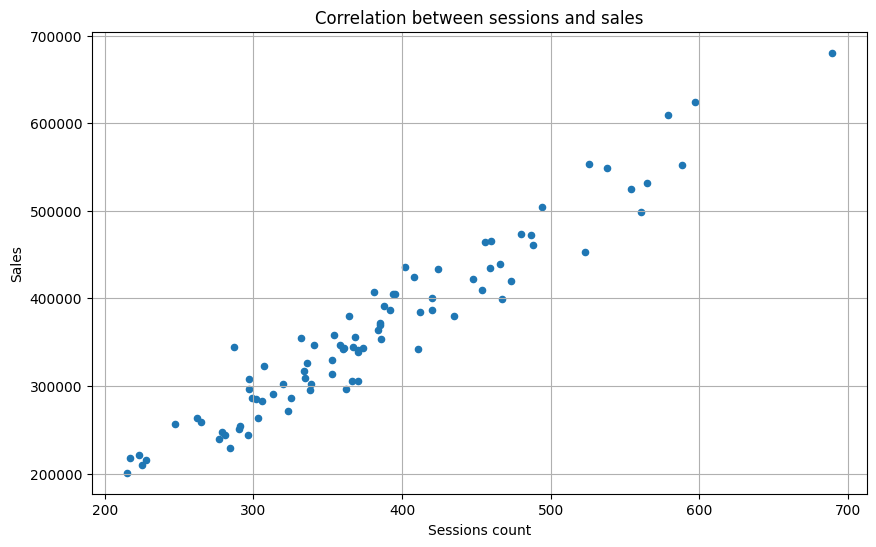

К of correlation: 0.96, p-value: 2.24477831491671e-51
The correlation is statistically significant


In [ ]:
# correlation between sessions and sales

# calculating sessions and sales by date
sessions_and_sales = data.groupby('order_date').agg(
    total_sessions=('ga_session_id', 'nunique'),
    total_sales=('product_price', 'sum')
)

# creating plot
sessions_and_sales.plot(
    kind='scatter',
    x='total_sessions',
    y='total_sales',
    figsize=(10, 6),
    title="Correlation between sessions and sales"
)
plt.xlabel("Sessions count")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# correlation between sessions and sales
correlation, p_value = pearsonr(sessions_and_sales['total_sessions'], sessions_and_sales['total_sales'])
print(f"К of correlation: {correlation:.2f}, p-value: {p_value}")
if p_value < 0.05:
    print("The correlation is statistically significant")
else:
    print("The correlation is тще statistically significant")

The coefficient of correlation indicates a strong positive linear relationship between the number of sessions on the website and the total sales volume. As the number of sessions increases, total sales also rise. The p-value suggests that the high correlation is statistically significant, and the observed relationship is unlikely to have occurred by chance

In [ ]:
# correlation between continents and sales
# calculating sales by top 3 continents
sales_by_continent = data.groupby(['order_date', 'continent'])['product_price'].sum().unstack()
top_3_continents = sales_by_continent.sum().nlargest(3).index
sales_by_top_3_continent = sales_by_continent[top_3_continents]

# correlation matrix between continents and sales
correlation_matrix = sales_by_top_3_continent.corr()
print("Correlation matrix between continents and sales:")
print(correlation_matrix)

Correlation matrix between continents and sales:
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.692273  0.669527
Asia       0.692273  1.000000  0.667786
Europe     0.669527  0.667786  1.000000


Analysis of the correlation matrix revealed statistically significant and high positive correlation coefficients (r ≈ 1) across all continental sales pairs.

This indicates a strong intercontinental linear dependency, where sales growth in one region is synchronously reflected in others. This high synchronicity confirms that external factors act as a universal sales driver, outweighing local differences. This warrants further investigation into common external variables (such as global seasonality, macroeconomic conditions, or centrally managed marketing campaigns) to effectively manage these drivers.

In [ ]:
# correlation between traffic channel and sales
# calculating sales by traffic channel
sales_by_channel = data.groupby(['order_date', 'traffic_channel'])['product_price'].sum().unstack()

# correlation matrix between traffic channel and sales
correlation_matrix_channel = sales_by_channel.corr()
print("Correlation matrix between traffic channel and sales:")
print(correlation_matrix_channel)

Correlation matrix between traffic channel and sales:
traffic_channel    Direct  Organic Search  Paid Search  Social Search  \
traffic_channel                                                         
Direct           1.000000        0.759938     0.724343       0.461895   
Organic Search   0.759938        1.000000     0.808234       0.434424   
Paid Search      0.724343        0.808234     1.000000       0.452287   
Social Search    0.461895        0.434424     0.452287       1.000000   
Undefined        0.424039        0.435418     0.430021       0.359342   

traffic_channel  Undefined  
traffic_channel             
Direct            0.424039  
Organic Search    0.435418  
Paid Search       0.430021  
Social Search     0.359342  
Undefined         1.000000  


Analysis of the sales correlation matrix revealed high positive correlation coefficients between the sales dynamics by traffic channel.

Statistically significant synchronous dynamic indicates that sales are being influenced by a universal external driver that outweighs local market specificities.

Such strong intercontinental dependency mandates further investigation into common external factors (global seasonality, macroeconomic conditions, or centrally managed marketing campaigns) for targeted, centralized forecasting and management of global sales.

In [ ]:
# correlation between top 5 categories and sales
# calculating sales by top 5 categories
sales_by_category = data.groupby(['order_date', 'product_category'])['product_price'].sum().unstack()
top_5_categories = sales_by_category.sum().nlargest(5).index
filtered_sales_by_category = sales_by_category[top_5_categories]

# correlation matrix between top 5 categories and sales
category_correlation_matrix = filtered_sales_by_category.corr()
print("Correlation matrix between top 5 categories and sales:")
print(category_correlation_matrix)

Correlation matrix between top 5 categories and sales:
product_category            Sofas & armchairs    Chairs      Beds  \
product_category                                                    
Sofas & armchairs                    1.000000  0.578248  0.535378   
Chairs                               0.578248  1.000000  0.554500   
Beds                                 0.535378  0.554500  1.000000   
Bookcases & shelving units           0.666194  0.637090  0.592913   
Cabinets & cupboards                 0.657563  0.572870  0.514609   

product_category            Bookcases & shelving units  Cabinets & cupboards  
product_category                                                              
Sofas & armchairs                             0.666194              0.657563  
Chairs                                        0.637090              0.572870  
Beds                                          0.592913              0.514609  
Bookcases & shelving units                    1.000000            

Each element within the pairwise correlation matrix reflects the strength and direction of the linear relationship between the sales dynamics of two categories.

A moderate positive correlation was found among the majority of the top categories. This suggests that the categories are interdependent, and while growth in one category generally stimulates growth in another, this synchronicity is not absolute.

Business Implications: The moderate dependency indicates the presence of unrealized potential for optimizing cross-selling and bundling strategies. There is a clear opportunity to strengthen this link through targeted recommendation systems and promotional activities to convert the moderate correlation into a strong one, thereby maximizing the average transaction value.

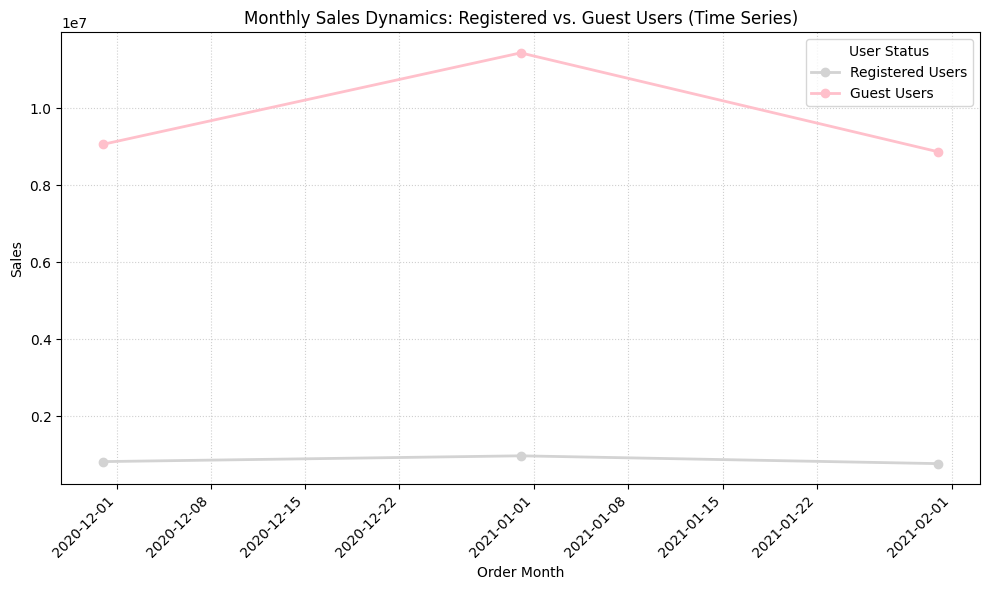


К of correlation between user status and sales: 0.98, p-value: 0.117


In [ ]:
# correlation between user status and sales
# сalculating sales by user status over time
sales_by_user_status = data.groupby(
    [pd.Grouper(key='order_date', freq='ME'), 'user_status'] #monthly view
)['product_price'].sum().unstack()

# creating plot
plt.figure(figsize=(10, 6))
plt.plot(
    sales_by_user_status.index,
    sales_by_user_status['Registered'].fillna(0),
    label='Registered Users',
    color='lightgray',
    marker='o', # markers
    linewidth=2
)
plt.plot(
    sales_by_user_status['Guest'].fillna(0),
    label='Guest Users',
    color='pink',
    marker='o',
    linewidth=2
)

# plot settings
plt.title("Monthly Sales Dynamics: Registered vs. Guest Users (Time Series)")
plt.xlabel("Order Month")
plt.ylabel("Sales")
plt.legend(title="User Status")
plt.grid(True, linestyle=':', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# correlation between user status and sales
correlation, p_value = pearsonr(
    sales_by_user_status['Registered'].fillna(0),
    sales_by_user_status['Guest'].fillna(0)
)

print(f"\nК of correlation between user status and sales: {correlation:.2f}, p-value: {p_value:.3f}")

Strong Dependence on External Drivers: The high and statistically significant correlation (r=0.86) confirms that the sales of both groups act in lockstep. This means that common external factors (such as global holidays, general seasonal promotions, overall market demand, or macroeconomic conditions) are the primary sales drivers for the entire business, irrespective of user status.

Scalability Efficiency: Any major marketing or product initiative that influences market demand will have a multiplicative effect on both user groups.

Priority: Registered Users: Since Registered Users (visually) generate a larger absolute volume, efforts to retain them and boost their loyalty will yield the highest revenue impact, especially during periods of peak demand.

In [ ]:
# correlation between device and sales
# calculating sales by device
sales_by_device = data.groupby(['order_date', 'device'])['product_price'].sum().unstack()

# correlation matrix between device and sales
correlation_matrix_channel = sales_by_device.corr()
print("Correlation matrix between device and sales:")
print(correlation_matrix_channel)

Correlation matrix between device and sales:
device    desktop    mobile    tablet
device                               
desktop  1.000000  0.805720  0.538453
mobile   0.805720  1.000000  0.495752
tablet   0.538453  0.495752  1.000000


Prioritize Cross-Platform Experience (Desktop ↔ Mobile): Given the strong correlation of 0.80, strategies focused on boosting sales on one of these two devices will have a significant, predictable spillover effect on the other. The company must invest heavily in ensuring a seamless, uninterrupted user experience to maximize conversion during user transitions between Mobile and Desktop.

Targeted Tablet Strategy: The moderate correlation of the Tablet channel means that success cannot simply be scaled from the Desktop or Mobile strategy. Specific analysis is required to identify the unique factors driving Tablet sales (e.g., type of content, time of day, specific audience segments) to develop targeted, effective campaigns.

Forecasting Reliability: The strong correlation between Desktop and Mobile allows for reliable forecasting. For example, an unexpected surge in Mobile sales is a strong indicator of an impending surge in Desktop sales during the same time period.

**Statistical Analysis of Differences Between Groups**

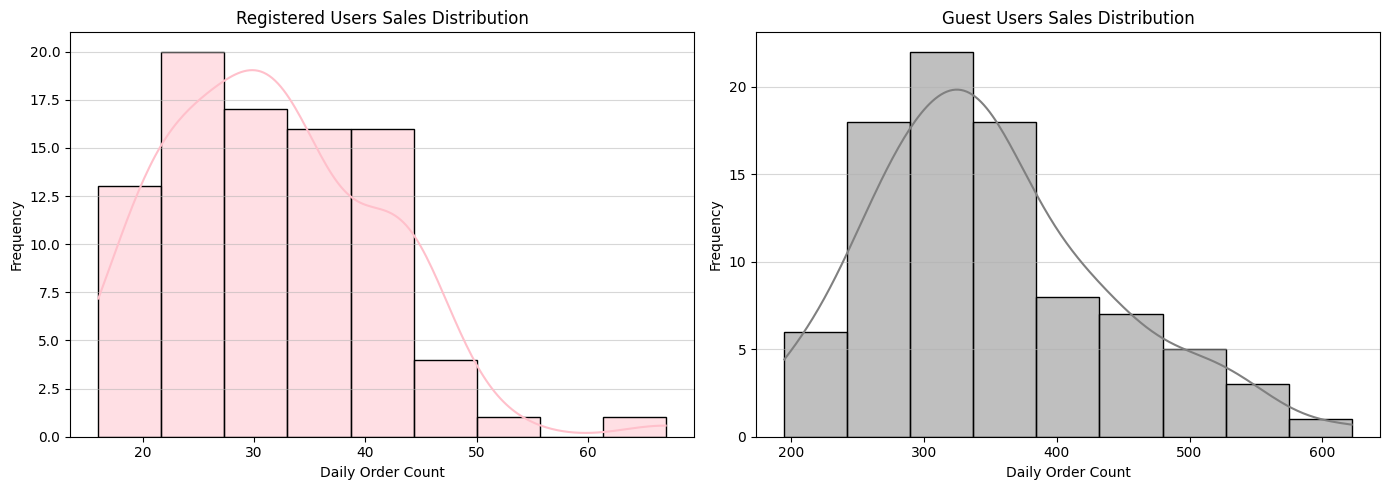

Shapiro-Wilk for registered users: p = 0.005719393750019619
Shapiro-Wilk for guests: p = 0.013340679715658147
Normaltest for registered users: p = 0.016470601946921425
Normaltest for guests: p = 0.028561644380598453


In [ ]:
# analysis of sales by user status
# filtering data
registered_users = data[data['user_status'] == 'Registered']
guests = data[data['user_status'] == 'Guest']

# grouping of data by date
registered_sales_by_date = registered_users.groupby('order_date').size()
guests_sales_by_date = guests.groupby('order_date').size()

# creating spot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# registered users spot
sns.histplot(
    registered_sales_by_date,
    kde=True,
    color='pink',
    ax=ax1 # left side
)
ax1.set_title('Registered Users Sales Distribution')
ax1.set_xlabel('Daily Order Count')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.5)

# guest users spot
sns.histplot(
    guests_sales_by_date,
    kde=True,
    color='gray',
    ax=ax2 # right side
)
ax2.set_title('Guest Users Sales Distribution')
ax2.set_xlabel('Daily Order Count')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.5)

# plot settings
plt.tight_layout()
plt.show()

# normaltest
_, p_value_normaltest_normal = normaltest(registered_sales_by_date)
_, p_value_normaltest_non_normal = normaltest(guests_sales_by_date)

# shapiro-Wilk test
stat_registered, p_registered = shapiro(registered_sales_by_date)
stat_unregistered, p_unregistered = shapiro(guests_sales_by_date)

print(f"Shapiro-Wilk for registered users: p = {p_registered}")
print(f"Shapiro-Wilk for guests: p = {p_unregistered}")
print(f"Normaltest for registered users: p = {p_value_normaltest_normal}")
print(f"Normaltest for guests: p = {p_value_normaltest_non_normal}")


Registered Users: The sales distribution for registered customers is wider and exhibits lower kurtosis (fewer sharp peaks). This wider spread suggests a more stable and predictable sales flow across the measured period, indicating a strong base revenue source.

Guest Users: Conversely, the distribution for guest (unregistered) users is narrower with pronounced, high-frequency peaks. This signals a more volatile sales pattern, likely driven by sporadic, high-impact events such as short-term promotions or high seasonal activity.

The Shapiro-Wilk normality test and normal Pirson test provide insight for subsequent statistical modeling:

Registered Users: The test confirms that the sales distribution for registered users and guest conforms to a normal distribution (p−value>0.05). This validates the direct application of standard parametric statistical tests (e.g., t-tests, ANOVA) to this segment's data.

Conclusion

The observed distributional results confirm the need for parametric modeling analytical approach for the stable Registered and Guests segments.

In [ ]:
# analysis of sessions count by traffic channel
traffic_channels = data['traffic_channel'].unique()
channel_data = []

for channel in traffic_channels:
    # selection for the channel
    channel_sessions = data[data['traffic_channel'] == channel]['ga_session_id']

    # grouping of data
    daily_sessions = channel_sessions.groupby(data['order_date']).count()

    # adding data
    if not daily_sessions.empty:
        channel_data.append(daily_sessions.values)

# perform the Kruskal-Wallis test
H_statistic, p_value = kruskal(*channel_data)

print(f"\nKruskal-Wallis statistic: (H): {H_statistic:.2f}")
print(f"P-value: {p_value:.5f}")
# interpretation
if p_value < 0.05:
    print("There is a significant difference in traffic channels.")
else:
    print("There is no significant difference in traffic channels.")


Kruskal-Wallis statistic: (H): 349.43
P-value: 0.00000
There is a significant difference in traffic channels.


The Kruskal-Wallis H test yielded a highly significant result (H=349.43,p<0.001).

This leads to the rejection of the null hypothesis, which stated that the median number of sessions is equal across all traffic channels.

Conclusion: There are statistically significant differences in the distribution of session counts among the various traffic channels. This confirms that at least one traffic channel's session volume differs meaningfully from the others.

Next Step (Actionable Insight): To identify which specific pairs of channels are driving this difference (e.g., is Organic significantly different from Paid?), a post-hoc test (such as Dunn's test) with appropriate correction for multiple comparisons must be conducted. This step is necessary to provide targeted recommendations for resource allocation and marketing spend.

In [ ]:
# organic search groups diffrencess in Europe and America

data['is_organic'] = np.where(data['traffic_channel'] == 'Organic Search', 1, 0)

# filtering of data
data_filtered = data[data['continent'].isin(['Europe', 'Americas'])].copy()

# aggregation of data
summary_data = data_filtered.groupby('continent').agg(
    # X: organic_sessions
    organic_sessions=('is_organic', 'sum'),
    # N: total_sessions
    total_sessions=('ga_session_id', 'count')
)

# preparing variables
N_Europe = summary_data.loc['Europe', 'total_sessions']
X_Europe = summary_data.loc['Europe', 'organic_sessions']

N_America = summary_data.loc['Americas', 'total_sessions']
X_America = summary_data.loc['Americas', 'organic_sessions']

# calculating shares
p_hat_Europe = X_Europe / N_Europe
p_hat_America = X_America / N_America

print("Sourse data")
print(f"Europe (N={N_Europe:.0f}, X={X_Europe:.0f}, p_hat={p_hat_Europe:.4f})")
print(f"Аmerica (N={N_America:.0f}, X={X_America:.0f}, p_hat={p_hat_America:.4f})")

# Z-test
count = np.array([X_Europe, X_America])
nobs = np.array([N_Europe, N_America])

z_statistic, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print("\nZ-test results")
print(f"Z-stat: {z_statistic:.4f}")
print(f"P-value: {p_value:.5f}")

Sourse data
Europe (N=6261, X=2238, p_hat=0.3575)
Аmerica (N=18553, X=6536, p_hat=0.3523)

Z-test results
Z-stat: 0.7389
P-value: 0.45999


Hypothesis Formulation: The null hypothesis posited that the organic traffic share is equal between Europe and America.

Decision: The P-value (0.4600) exceeds the standard significance level of α=0.05. Therefore, we fail to reject the null hypothesis
Analytical Finding: There is no statistically significant difference in the proportion of sessions originating from organic traffic between Europe (
p=35.75%) and America (p=35.23%). The observed difference (0.52 percentage points) is considered due to random sampling variation and does not represent a true underlying difference between the two regions.

Business Implication:

Strategy Efficiency: This indicates that the fundamental effectiveness of the SEO strategy is consistent across both geographical regions.

Recommendation: When planning marketing strategies and allocating resources, the Organic Search channel should be treated as a stable and predictable channel with comparable efficacy in both Europe and America. There is no need for immediate, drastically different SEO strategies to address performance imbalances between these two continents

**Dashboard of visualizations:** https://public.tableau.com/views/Salesanalysis_17619092625440/Sales?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link